In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Load the 3 json files conforming the dataset into a pandas DataFrame
df1 = pd.read_json("../data/tacred/train.json")
df2 = pd.read_json("../data/tacred/test.json")
df3 = pd.read_json("../data/tacred/dev.json")

# Concatenate the 3 DataFrames into a single one
df = pd.concat([df1, df2, df3])

df.head()

,id,docid,relation,token,subj_start,subj_end,obj_start,obj_end,subj_type,obj_type,stanford_pos,stanford_ner,stanford_head,stanford_deprel
0,61b3a5c8c9a882dcfcd2,AFP_ENG_20070218.0019.LDC2009T13,org:founded_by,"[Tom, Thabane, resigned, in, October, last, ye...",10,12,0,1,ORGANIZATION,PERSON,"[NNP, NNP, VBD, IN, NNP, JJ, NN, TO, VB, DT, D...","[PERSON, PERSON, O, O, DATE, DATE, DATE, O, O,...","[2, 3, 0, 5, 3, 7, 3, 9, 3, 13, 13, 13, 9, 15,...","[compound, nsubj, ROOT, case, nmod, amod, nmod..."
1,61b3a65fb9b7111c4ca4,NYT_ENG_20071026.0056.LDC2009T13,no_relation,"[In, 1983, ,, a, year, after, the, rally, ,, F...",9,9,19,20,PERSON,PERSON,"[IN, CD, ,, DT, NN, IN, DT, NN, ,, NNP, VBD, D...","[O, DATE, O, DURATION, DURATION, O, O, O, O, P...","[2, 11, 11, 5, 11, 8, 8, 5, 11, 11, 0, 16, 16,...","[case, nmod, punct, det, nmod:tmod, case, det,..."
2,61b3a65fb9aeb61c81e7,eng-NG-31-126955-9171242,no_relation,"[This, was, among, a, batch, of, paperback, Ox...",26,26,7,8,ORGANIZATION,ORGANIZATION,"[DT, VBD, IN, DT, NN, IN, NN, NNP, NNP, POS, N...","[O, O, O, O, O, O, O, ORGANIZATION, ORGANIZATI...","[5, 5, 5, 5, 0, 11, 9, 9, 11, 9, 5, 15, 15, 15...","[nsubj, cop, case, det, ROOT, case, compound, ..."
3,61b3a65fb9c9956eccbc,APW_ENG_20100119.0780,no_relation,"[The, latest, investigation, was, authorized, ...",55,55,28,29,ORGANIZATION,NUMBER,"[DT, JJS, NN, VBD, VBN, IN, DT, NNP, NNP, IN, ...","[O, O, O, O, O, O, O, ORGANIZATION, ORGANIZATI...","[3, 3, 5, 5, 0, 9, 9, 9, 5, 11, 5, 5, 21, 13, ...","[det, amod, nsubjpass, auxpass, ROOT, case, de..."
4,61b3a65fb9197aba87ff,APW_ENG_20070501.0905.LDC2009T13,no_relation,"[The, event, is, a, response, to, a, White, Ho...",23,26,13,13,ORGANIZATION,DATE,"[DT, NN, VBZ, DT, NN, TO, DT, NNP, NNP, NN, NN...","[O, O, O, O, O, O, O, ORGANIZATION, ORGANIZATI...","[2, 5, 5, 5, 16, 12, 12, 12, 12, 12, 12, 5, 14...","[det, nsubj, cop, det, ccomp, case, det, compo..."


In this dataset, `subj` is the subject of the relation, and `obj` is the object of the relation. The `relation` column contains the relation between the subject and the object. Both the subject and the object can have several types.

## Distribution of relations

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_4203/542695047.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

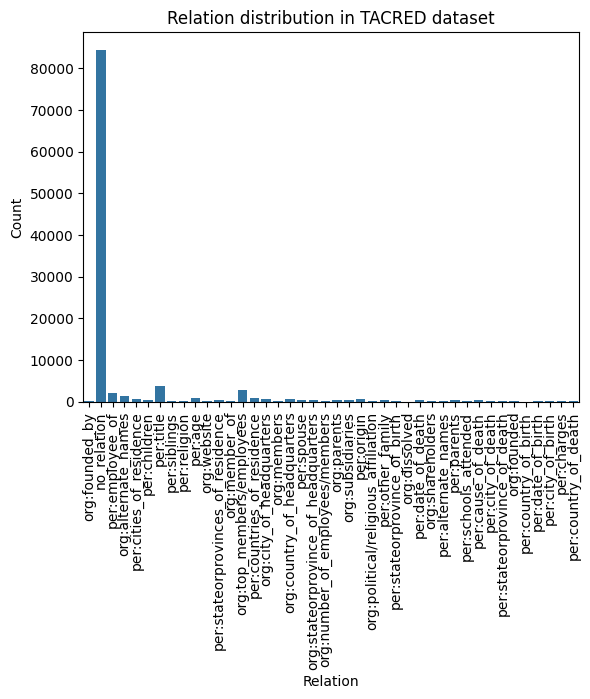

In [4]:
# Plot the distribution of relation types in seaborn
ax = sns.countplot(x="relation", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Relation distribution in TACRED dataset")
ax.set_xlabel("Relation")
ax.set_ylabel("Count")

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_4203/4133746226.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

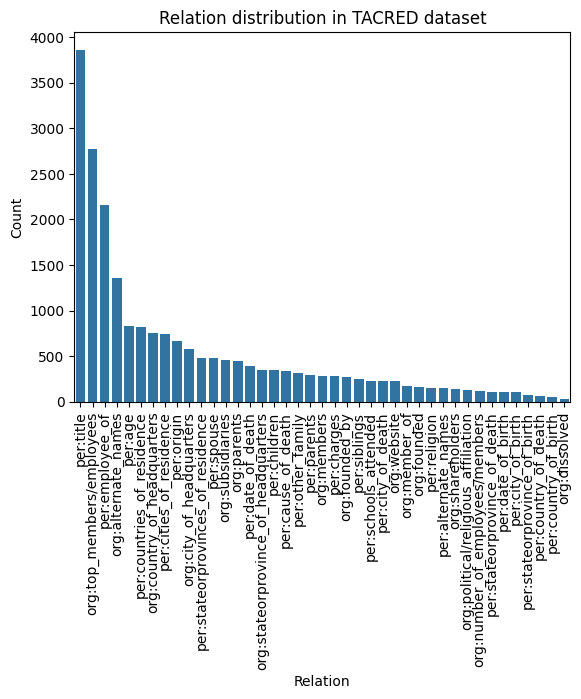

In [5]:
# Plot the same distribution without no_relation and order the relations by count
ax = sns.countplot(
    x="relation",
    data=df[df["relation"] != "no_relation"],
    order=df[df["relation"] != "no_relation"]["relation"].value_counts().index,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Relation distribution in TACRED dataset")
ax.set_xlabel("Relation")
ax.set_ylabel("Count")

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_4203/2178717640.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

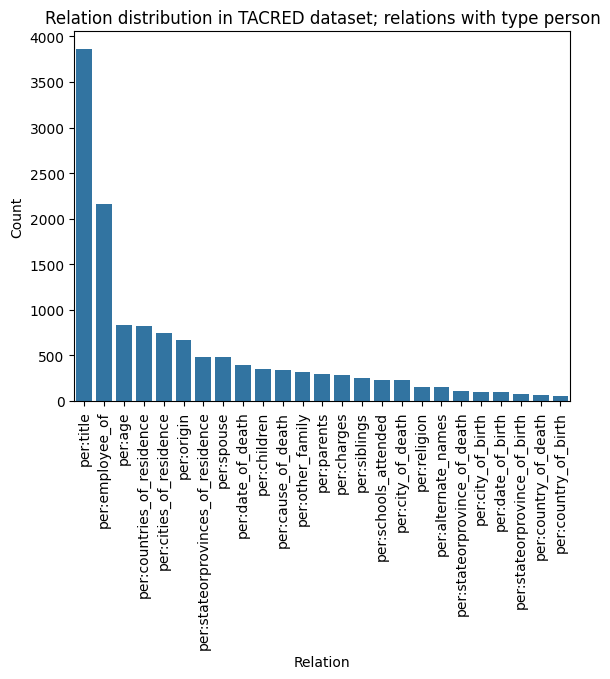

In [6]:
# Plot the same but only focusing on those relations that start with "per:"
ax = sns.countplot(
    x="relation",
    data=df[df["relation"].str.startswith("per:")],
    order=df[df["relation"].str.startswith("per:")]["relation"].value_counts().index,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Relation distribution in TACRED dataset; relations with type person")
ax.set_xlabel("Relation")
ax.set_ylabel("Count")

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_4203/3866290182.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

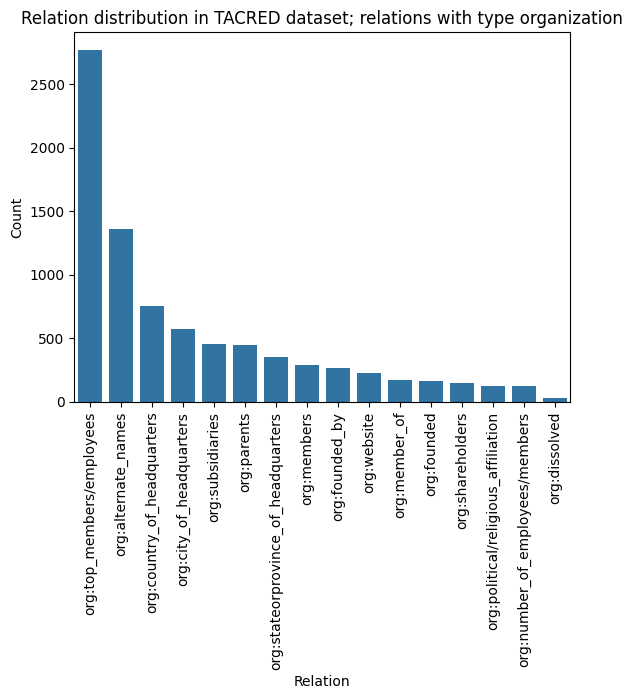

In [7]:
# Plot the same but only focusing on those relations that start with "org:"
ax = sns.countplot(
    x="relation",
    data=df[df["relation"].str.startswith("org:")],
    order=df[df["relation"].str.startswith("org:")]["relation"].value_counts().index,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(
    "Relation distribution in TACRED dataset; relations with type organization"
)
ax.set_xlabel("Relation")
ax.set_ylabel("Count")

## Distribution of subjects and objects

### Subjects

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_4203/144686272.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

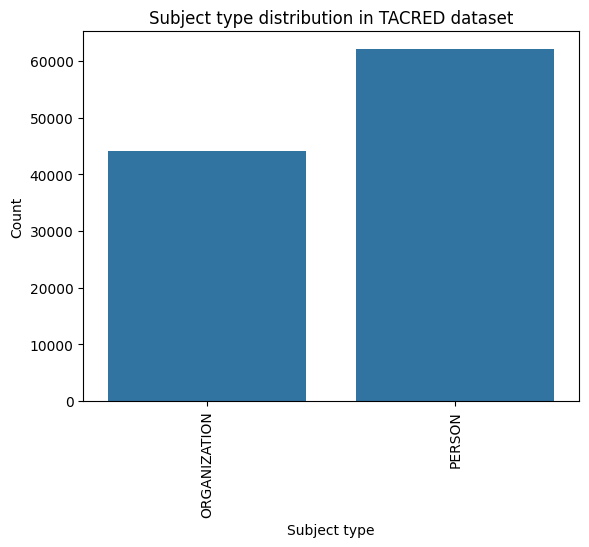

In [8]:
# Plot the distribution of subj types in seaborn
ax = sns.countplot(x="subj_type", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Subject type distribution in TACRED dataset")
ax.set_xlabel("Subject type")
ax.set_ylabel("Count")

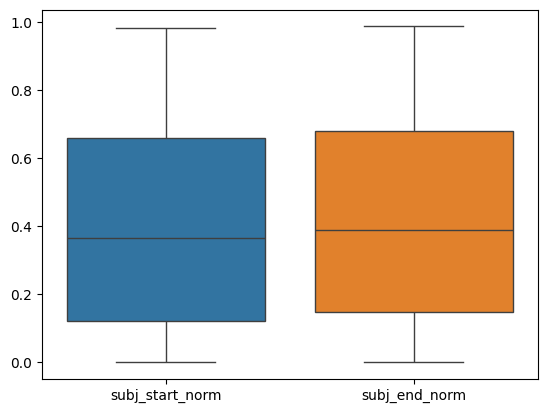

In [14]:
# Boxplot of the subj_start and subj_end columns and normalize by the length of the sentence
df["subj_start_norm"] = df["subj_start"] / df["token"].apply(len)
df["subj_end_norm"] = df["subj_end"] / df["token"].apply(len)
ax = sns.boxplot(data=df[["subj_start_norm", "subj_end_norm"]])

### Objects

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_4203/1865281949.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

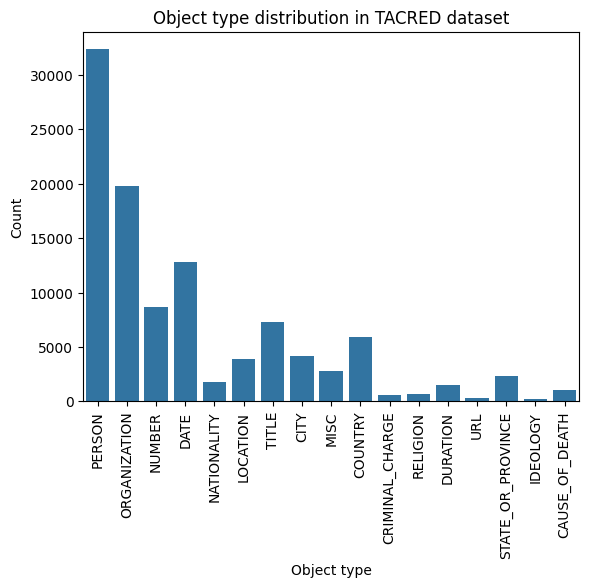

In [10]:
# Plot the distribution of obj types in seaborn
ax = sns.countplot(x="obj_type", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Object type distribution in TACRED dataset")
ax.set_xlabel("Object type")
ax.set_ylabel("Count")

<Axes: >

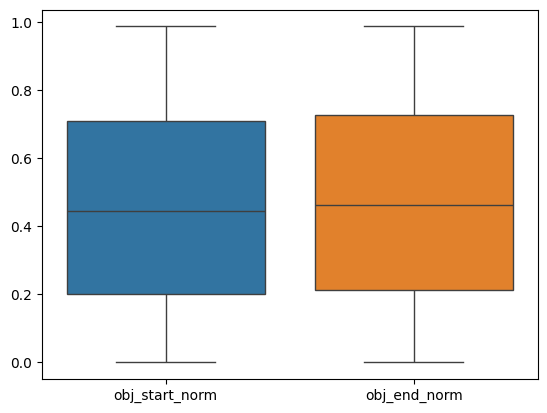

In [12]:
# Boxplot of the obj_start and obj_end columns and normalize it by the length of the sentence
df["obj_start_norm"] = df["obj_start"] / df["token"].str.len()
df["obj_end_norm"] = df["obj_end"] / df["token"].str.len()
sns.boxplot(data=df[["obj_start_norm", "obj_end_norm"]])

## Information about the text

<Axes: xlabel='num_tokens', ylabel='Count'>

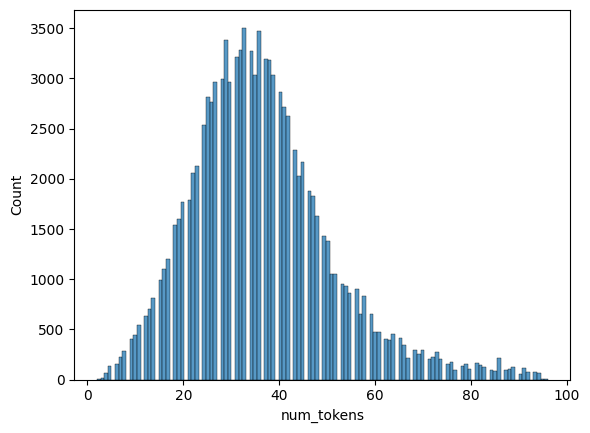

In [ ]:
# Plot the distribution of the number of tokens in the sentence
df["num_tokens"] = df["token"].apply(lambda x: len(x))
sns.histplot(df["num_tokens"])

<Axes: ylabel='num_tokens'>

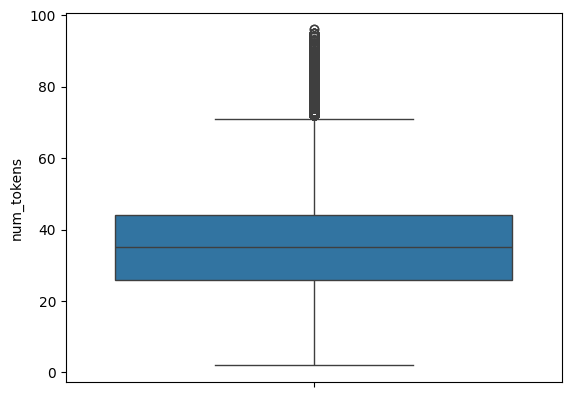

In [ ]:
# Boxplot of the num_tokens column
sns.boxplot(data=df["num_tokens"])

## Bivariate & Trivariate analysis

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_36205/1265244685.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Number of tokens')

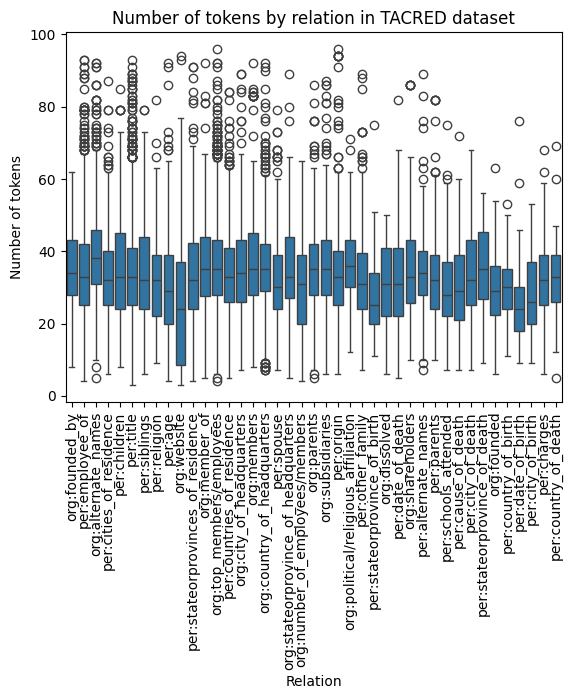

In [ ]:
# Plot the distribution of the number of tokens in the sentence by relation, exlucluding no_relation, and making the plot wider
ax = sns.boxplot(x="relation", y="num_tokens", data=df[df["relation"] != "no_relation"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Number of tokens by relation in TACRED dataset")
ax.set_xlabel("Relation")
ax.set_ylabel("Number of tokens")

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_36205/3170739000.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Number of tokens')

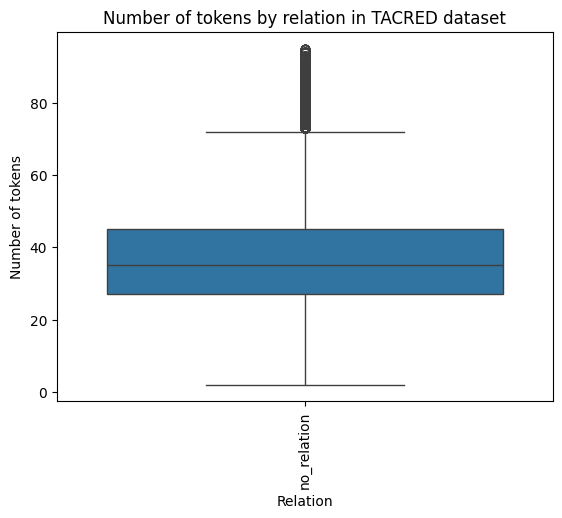

In [ ]:
# Plot the distribution of the number of tokens in the sentence by relation, only no_relation, and making the plot wider
ax = sns.boxplot(x="relation", y="num_tokens", data=df[df["relation"] == "no_relation"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Number of tokens by relation in TACRED dataset")
ax.set_xlabel("Relation")
ax.set_ylabel("Number of tokens")

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_36205/570367709.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


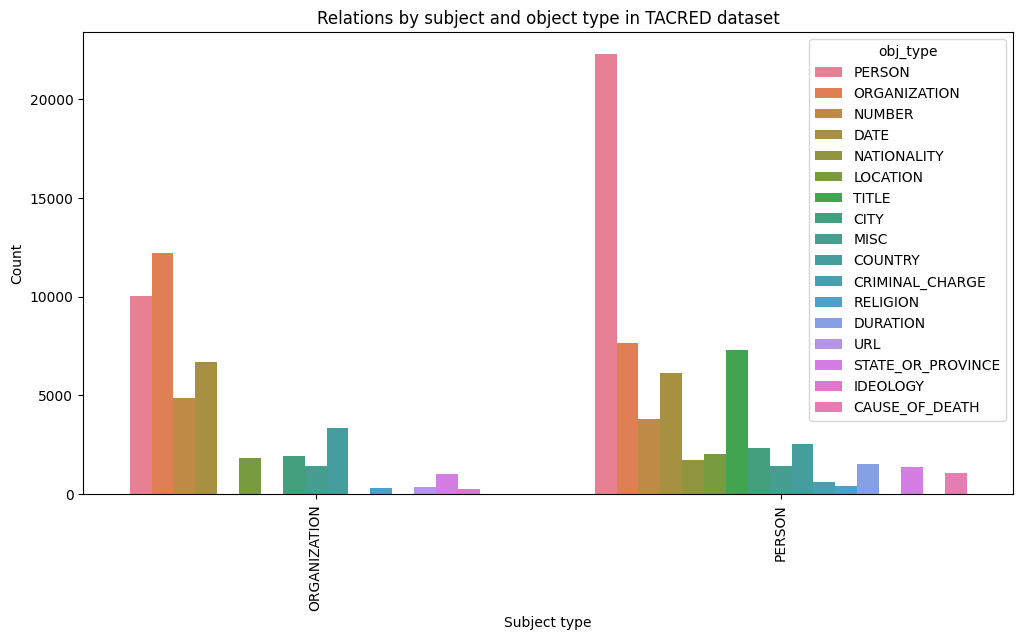

In [ ]:
# Plot the distribution of relations by subj_type and obj_type
ax = sns.countplot(x="subj_type", hue="obj_type", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Relations by subject and object type in TACRED dataset")
ax.set_xlabel("Subject type")
ax.set_ylabel("Count")
ax.figure.set_size_inches(12, 6)

/var/folders/s0/4h4_2s7n3wxbm06wx8y43mm80000gn/T/ipykernel_36205/3750133245.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


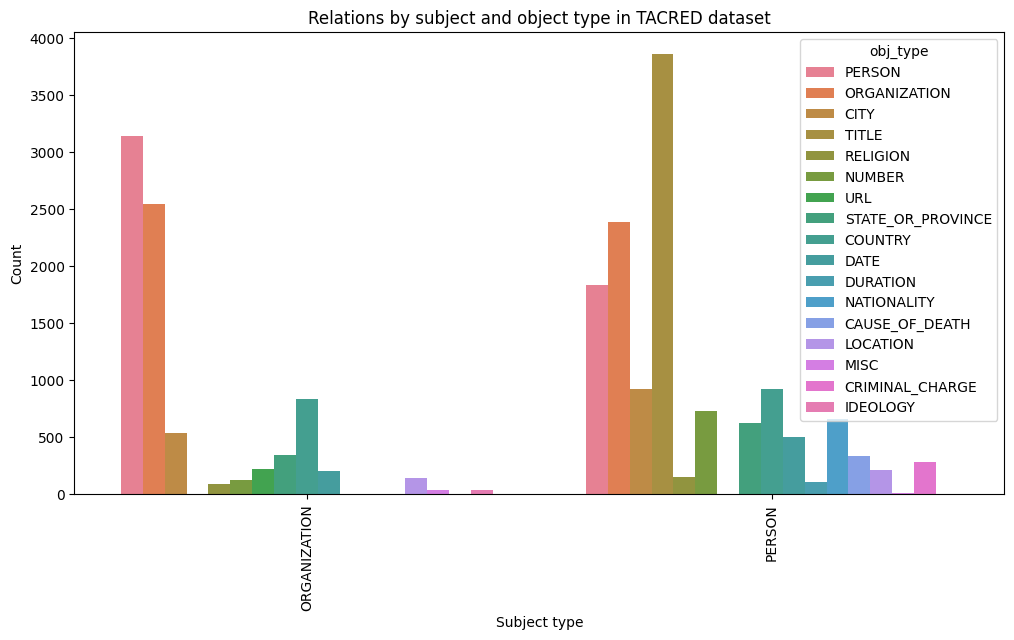

In [ ]:
# Plot the distribution of relations by subj_type and obj_type, exluding no_relation
ax = sns.countplot(
    x="subj_type", hue="obj_type", data=df[df["relation"] != "no_relation"]
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Relations by subject and object type in TACRED dataset")
ax.set_xlabel("Subject type")
ax.set_ylabel("Count")
ax.figure.set_size_inches(12, 6)  # Make the plot wider